### <font color=darkblue> Import Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.cluster import KMeans 
%matplotlib inline
import statsmodels.api as sm # regression function resides here
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings("ignore")

### <font color=darkblue> Read Transaction Dataset and view first five records
<font color=darkblue> Subscription Master is the Fact table with all transactions

In [2]:
sub=pd.read_csv("sub.csv")

In [3]:
sub.head(5)

,id,created_at,end_date,is_active,product_name,product_quantity,product_type,product_unit,product_unit_cost,recently_changed_flag,...,product_master,subscription_type,user,offer_id,pause_start_date,pause_end_date,subscription_coupon_code,metadata,source,fulfilled_by_vendor
0,00000039-f06f-4b17-8616-2610be32b5f3,2019-06-13 16:13:12,2019-06-14 23:59:59,1,Delivery charge,1,54.0,1,5.0,1,...,4d7a9702-c1cc-42df-979f-48067ca03142,DkFOhwBsDA,397cad1f-89f7-4e41-b6c1-b57f2a7bd6e5,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,000007c7-3121-4ae9-993f-550106e6f2f9,2019-06-11 17:18:31,2019-06-12 23:59:59,1,Dishwash Liquid Pril,2,19.0,425 ml,99.0,1,...,0bdeb59b-cea0-44bd-97ef-edbc3a7ace82,DkFOhwBsDA,0a7d1c3c-7aba-4649-838b-1e49b62b2a2d,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,000007ee-c01c-42d0-b541-8a46d97014ef,2019-03-02 15:47:31,2019-03-03 23:59:59,1,Nandini Shubham Milk,2,1.0,500 ml,21.0,1,...,54a2d415-97ec-4f5b-b338-1eae07777644,DkFOhwBsDA,a6c1541b-16c0-4460-85ab-6d68760fe764,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,00000e5b-15a6-48f3-a8fd-b8360174c09c,2019-09-09 15:48:06,2019-09-10 23:59:59,1,Nandini Shubham Milk,1,1.0,500 ml,22.0,1,...,dbcbce69-f5bb-4889-a892-6a686eca1354,DkFOhwBsDA,8e67aa7e-1ba6-44f5-bea9-113a3bb0ce41,NaN,NaN,NaN,NaN,NaN,0.0,1.0
4,000011ca-5128-4537-86e9-4556e4b83957,2019-07-21 14:07:57,2019-07-22 23:59:59,1,Nandini Curd,1,4.0,500 gm,22.0,1,...,8eaebce4-7f3d-4753-be94-7bef0b75509d,DkFOhwBsDA,f056bc8d-c5a0-4345-a6a9-bf8455d089d9,NaN,NaN,NaN,NaN,NaN,0.0,1.0


### <font color=darkblue> Dataset Shape
<font color=darkblue> The dataset has 300409 observations and 23 variables

In [4]:
sub.shape

(300409, 23)

### <font color=darkblue> New Variable creation
<font color=darkblue> A new variable 'Amount' is created which is the product of quantity and unit cost

In [5]:
sub['Amount'] = sub['product_quantity'] * sub['product_unit_cost']

### <font color=darkblue> Checking count of null values in each column
<font color=darkblue>

In [6]:
sub.isnull().sum().sort_values(ascending=False)

pause_end_date              299588
pause_start_date            299588
subscription_coupon_code    298528
offer_id                    296915
metadata                    288656
fulfilled_by_vendor         188500
product_type                  2377
source                         384
Amount                           0
product_unit                     0
created_at                       0
end_date                         0
is_active                        0
product_name                     0
product_quantity                 0
updated_at                       0
product_unit_cost                0
recently_changed_flag            0
start_date                       0
verify_status                    0
product_master                   0
subscription_type                0
user                             0
id                               0
dtype: int64

### <font color=darkblue> Checking Data type of each column
<font color=darkblue>

In [7]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300409 entries, 0 to 300408
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        300409 non-null  object 
 1   created_at                300409 non-null  object 
 2   end_date                  300409 non-null  object 
 3   is_active                 300409 non-null  int64  
 4   product_name              300409 non-null  object 
 5   product_quantity          300409 non-null  int64  
 6   product_type              298032 non-null  float64
 7   product_unit              300409 non-null  object 
 8   product_unit_cost         300409 non-null  float64
 9   recently_changed_flag     300409 non-null  int64  
 10  start_date                300409 non-null  object 
 11  updated_at                300409 non-null  object 
 12  verify_status             300409 non-null  int64  
 13  product_master            300409 non-null  o

### <font color=darkblue> Data type correction
<font color=darkblue> Correcting the data type based on categorical and continuous nature

In [8]:
sub['product_type'].nunique()

24

In [9]:
sub['verify_status'].nunique()

2

In [10]:
sub['source'].nunique()

1

In [11]:
sub['is_active'] = sub['is_active'].astype('object')
sub['product_type'] = sub['product_type'].astype('category')
sub['verify_status'] = sub['product_type'].astype('category')
sub['source'] = sub['source'].astype('object')
sub['product_quantity'] = sub['product_quantity'].astype('int')
sub['product_unit_cost'] = sub['product_unit_cost'].astype('int')
sub['recently_changed_flag'] = sub['recently_changed_flag'].astype('category')
sub['fulfilled_by_vendor'] = sub['fulfilled_by_vendor'].astype('category')

### <font color=darkblue> Treatment of Primary Data
<font color=darkblue> Remove variables having more than 50% null values

In [12]:
sub.drop(['pause_end_date', 'pause_start_date','subscription_coupon_code','offer_id',
          'metadata','fulfilled_by_vendor','recently_changed_flag'], axis = 1, inplace=True)

### <font color=darkblue> Five Number Summary
<font color=darkblue> Checking the Five Number summary of the Dataset

In [13]:
sub.describe()

,product_quantity,product_unit_cost,Amount
count,300409.000000,300409.000000,300409.000000
mean,1.368018,33.902862,43.616412
std,0.848119,46.707617,68.824894
min,-31.000000,-200.000000,-200.000000
25%,1.000000,19.000000,21.000000
50%,1.000000,22.000000,32.000000
75%,1.000000,36.000000,50.000000
max,10.000000,2700.000000,9000.000000


### <font color=darkblue> Box Plot
<font color=darkblue> Understanding the summary statistics using Box Plot

Text(0.7, 87.5, 'IQR')

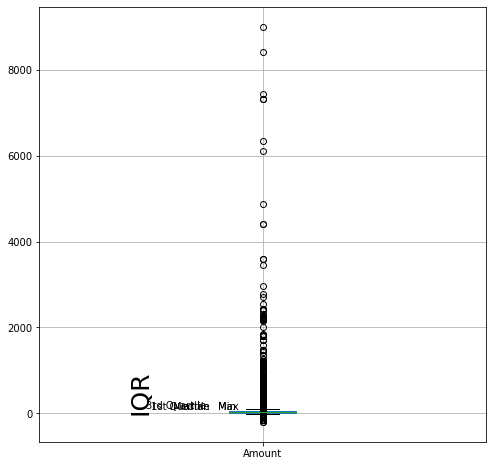

In [14]:
# Create boxplot for column="Amount"
sub.boxplot(column="Amount",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=102.00, s="3rd Quartile")
plt.text(x=0.8, y=87.00, s="Median")
plt.text(x=0.75, y=83.00, s="1st Quartile")
plt.text(x=0.90, y=92.00, s="Min")
plt.text(x=0.9, y=80.00, s="Max")
plt.text(x=0.7, y=87.5, s="IQR", rotation=90, size=25)

### <font color=darkblue> Checking the measures of Dispersion
<font color=darkblue> 

###  IQR

In [15]:
sub.quantile(0.75) - sub.quantile(0.25)

product_quantity      0.0
product_unit_cost    17.0
Amount               29.0
dtype: float64

###  Variance

In [16]:
print(sub.var())

is_active               0.000093
product_quantity        0.719306
product_type          291.422577
product_unit_cost    2181.601510
verify_status         291.422577
source                  0.000000
Amount               4736.866047
dtype: float64


###  Std. Dev

In [17]:
print(sub.std())

is_active             0.009654
product_quantity      0.848119
product_type         17.071104
product_unit_cost    46.707617
verify_status        17.071104
source                0.000000
Amount               68.824894
dtype: float64


###  Co-Variance

In [18]:
sub.cov()

,product_quantity,product_unit_cost,Amount
product_quantity,0.719306,-2.807621,15.332982
product_unit_cost,-2.807621,2181.601510,2560.828774
Amount,15.332982,2560.828774,4736.866047


### Correlation

In [19]:
sub.corr()

,product_quantity,product_unit_cost,Amount
product_quantity,1.000000,-0.070875,0.262678
product_unit_cost,-0.070875,1.000000,0.796613
Amount,0.262678,0.796613,1.000000


### Heatmap For checking the correlation

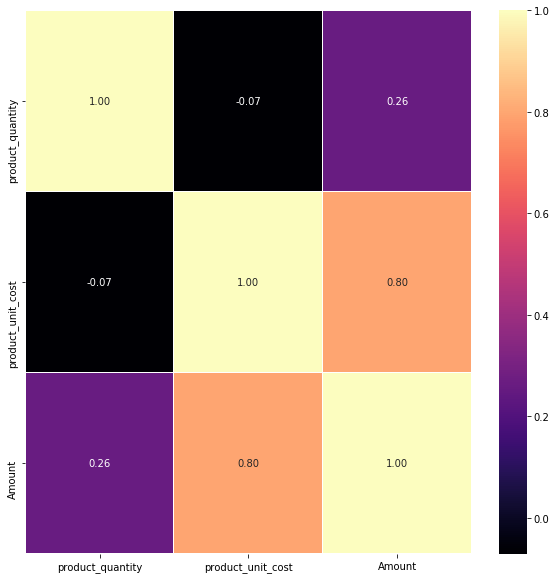

In [20]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(sub.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

### <font color=darkblue> Plotting the summary Mean, Median, Mode using Histogram
<font color=darkblue> 

Mean:  43.61641245768265 
Median:  32.0 
Mode:  5.0


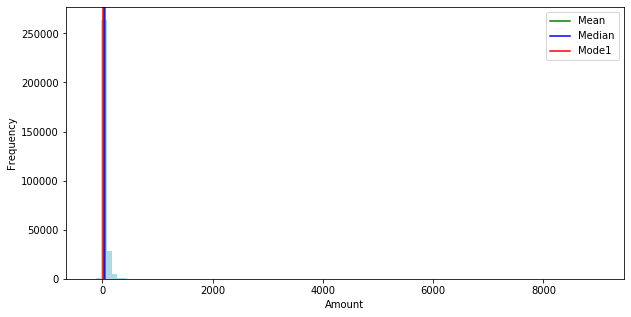

In [21]:
mean=sub['Amount'].mean()
median=sub['Amount'].median()
mode=sub['Amount'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(sub['Amount'],bins=100,color='lightblue')

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Amount')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

### <font color=darkblue> Check the Skewness and Kurtosis
<font color=darkblue> 

In [22]:
sub_test = sub.drop(['is_active', 'product_type','verify_status','source'], axis = 1)

In [23]:
sub_test.skew()

product_quantity      2.629071
product_unit_cost    12.057373
Amount               40.848338
dtype: float64

In [24]:
sub_test.kurt()

product_quantity       36.361074
product_unit_cost     322.948924
Amount               3794.538109
dtype: float64

### <font color=darkblue> Histogram for checking the Skewness


<font color=darkblue> 

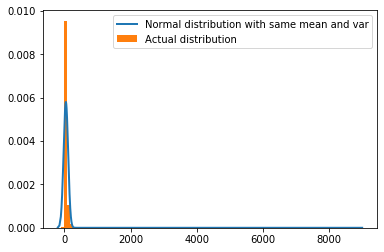

In [25]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(sub['Amount'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

### <font color=darkblue> Inferences
<font color=darkblue> 
    Skewness range is -1 to +1.                                                     
    Skewness is 40.84 which indicates the data is highly skewed.                                                   
    Kurtosis of 3794 indicates it is highly peaked.                                                       
    The data has lot of outliers.                                                                           
    Two method of Outlier detection and elimination are Z-Score and IQR    

### <font color=darkblue> Method - 1 (Z-Score)
<font color=darkblue> 
    Data scaled to Z-Scores                                                                                   
    Observations with a Z Score of > 3 are considered as Outliers

In [26]:
scipy.stats.zscore(sub['Amount'])

array([-0.56108298,  2.24313959, -0.02348591, ...,  0.32522571,
       -0.12519346, -0.35766787])

In [27]:
amt = np.abs(scipy.stats.zscore(sub['Amount']))
sub.iloc[np.where(amt>3)]

,id,created_at,end_date,is_active,product_name,product_quantity,product_type,product_unit,product_unit_cost,start_date,updated_at,verify_status,product_master,subscription_type,user,source,Amount
92,00016997-a388-4dd4-b111-9fd2606ef7c4,2019-06-21 16:47:29,2019-06-22 23:59:59,1,Towness Kaju Katli (Cashew),1,21.0,200 gm,252,2019-06-22 00:00:00,2019-06-21 16:47:29,21.0,293315da-377e-46e9-a6da-18aab4dbc820,DkFOhwBsDA,e7d71db2-0fde-4abe-a15a-93a46f16a632,0,252.0
94,00017142-8a00-4b08-99de-63f7fdaefe79,2019-09-02 16:59:23,2019-09-03 23:59:59,1,Whisper Ultra Clean - XL Wings,1,99.0,30 Nos,260,2019-09-03 00:00:00,2019-09-02 16:59:23,99.0,74e58b4b-144d-41fe-a6dc-ce6374241fca,DkFOhwBsDA,7a47090f-f35e-4baa-aeaa-f0169cdb70cf,0,260.0
123,0001ee3f-2d43-4c9d-9898-fbc49af6ad4e,2019-08-04 05:44:16,2019-08-05 23:59:59,1,Multi Surface Cleaner Formula 409,1,19.0,650 Ml,350,2019-08-05 00:00:00,2019-08-04 05:44:16,19.0,72a33392-9594-4ff1-a17f-776a27d684b7,DkFOhwBsDA,53345387-ee29-4ed4-be0d-b47bfe01719c,0,350.0
247,0003cf1e-9b34-49e8-8ee9-f9fd5e515afa,2019-04-12 17:06:44,2019-04-13 23:59:59,1,Towness Rice Sona Raw 24 Carat,1,21.0,5 Kg,293,2019-04-13 00:00:00,2019-04-12 17:29:23,21.0,c3032089-d3b5-4f00-92dc-3425fc4fab47,DkFOhwBsDA,3e86f626-51a4-4470-9941-f91c308eacab,0,293.0
283,000458b5-5643-42a7-9383-f096ecb6c922,2019-11-15 11:42:59,2019-11-16 23:59:59,1,Milklane Milk (Pack of 6),5,1.0,(Pack of 6) 1 No,179,2019-11-16 00:00:00,2019-11-15 11:42:59,1.0,76bf0649-9219-4a87-a215-9781aac67efe,DkFOhwBsDA,db854d05-6077-4b07-837a-fe83011954c0,0,895.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299756,11346856-4858-4809-80b1-a5b26196a075,2019-10-07 15:06:39,2019-10-08 23:59:59,1,Freedom Refined Sunflower Oil,5,21.0,1 Litre,90,2019-10-08 00:00:00,2019-10-07 15:30:21,21.0,75c4dad0-f3ba-4605-b1cd-3a9f0b995a25,DkFOhwBsDA,005c8201-f337-4bea-ac84-f23dd5456e7f,0,450.0
300060,1138c8f1-6f45-46fe-bb2c-044956d6ff0c,2019-01-29 12:28:14,2019-01-30 23:59:59,1,Surf Excel Washing Powder (Front Load),1,19.0,2 Kg,480,2019-01-30 00:00:00,2019-01-29 12:28:14,19.0,a828302a-7e14-4d05-9d02-128e98ee45f8,DkFOhwBsDA,b6620183-9734-42fc-a97d-b5cc52330203,0,480.0
300130,1139f319-c403-431c-a051-01fb561a16a4,2019-10-26 10:37:38,2019-11-17 18:29:59,1,Narayan Malai Paneer,1,1.0,1 Kg,320,2019-10-27 00:00:00,2019-11-17 00:18:19,1.0,90eb288d-993e-4cab-9e92-cbadf25f20ff,oFTxGvfV0d,381e31e3-647a-4af5-9d1b-36321733d808,0,320.0
300191,113ae10b-35a6-4b7e-8577-0adad76d0718,2019-02-02 15:21:29,2019-02-03 23:59:59,1,Erden Fresh A2 Cow ghee,1,21.0,500 gm,750,2019-02-03 00:00:00,2019-02-02 15:21:29,21.0,bfa67ac7-a062-4ad9-8fee-7fdaf51f3e1d,DkFOhwBsDA,1ed5528f-a6fa-4955-9d56-add68a27053e,0,750.0


### <font color=darkblue> 
<font color=darkblue> 
    There are 2622 observations with a Z-Score of > 3.                                                                   
    The data after removing outliers are stored in the Dataframe Sub1

In [28]:
sub1 = sub.iloc[np.where(amt<3)]

### <font color=darkblue> Five Number Summary
<font color=darkblue> Checking the Five Number summary of the Dataset after Ouliter elimination based on Z-Score

In [29]:
sub1.describe()

,product_quantity,product_unit_cost,Amount
count,297787.000000,297787.000000,297787.000000
mean,1.363508,31.289452,40.091337
std,0.834153,29.225003,35.051457
min,-31.000000,-150.000000,-150.000000
25%,1.000000,19.000000,21.000000
50%,1.000000,22.000000,31.000000
75%,1.000000,36.000000,48.000000
max,10.000000,300.000000,250.000000


### <font color=darkblue> Box Plot
<font color=darkblue> Understanding the summary statistics using Box Plot after outlier elimination based on Z-Score

Text(0.7, 87.5, 'IQR')

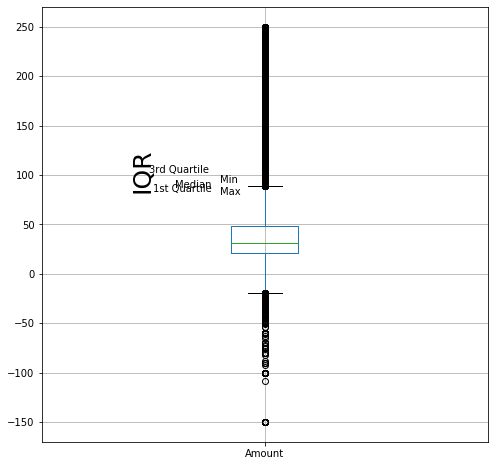

In [30]:
# Create boxplot for column="Amount"
sub1.boxplot(column="Amount",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=102.00, s="3rd Quartile")
plt.text(x=0.8, y=87.00, s="Median")
plt.text(x=0.75, y=83.00, s="1st Quartile")
plt.text(x=0.90, y=92.00, s="Min")
plt.text(x=0.9, y=80.00, s="Max")
plt.text(x=0.7, y=87.5, s="IQR", rotation=90, size=25)

### <font color=darkblue> Plotting the summary Mean, Median, Mode using Histogram
<font color=darkblue> 

Mean:  40.09133659293384 
Median:  31.0 
Mode:  5.0


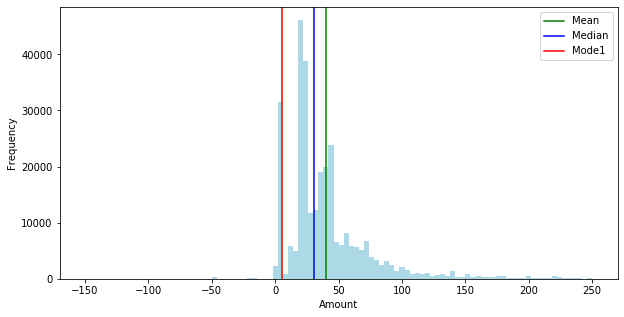

In [31]:
mean=sub1['Amount'].mean()
median=sub1['Amount'].median()
mode=sub1['Amount'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(sub1['Amount'],bins=100,color='lightblue')

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Amount')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

###  IQR

In [32]:
sub1.quantile(0.75) - sub1.quantile(0.25)

product_quantity      0.0
product_unit_cost    17.0
Amount               27.0
dtype: float64

### <font color=darkblue> Check the Skewness and Kurtosis after outlier elimination based on Z-Score
<font color=darkblue> 

In [33]:
sub_test = sub1.drop(['is_active', 'product_type','verify_status','source'], axis = 1)

In [34]:
sub_test.skew()

product_quantity     2.532480
product_unit_cost    3.098657
Amount               2.203391
dtype: float64

In [35]:
sub_test.kurt()

product_quantity     37.543907
product_unit_cost    14.050073
Amount                7.056579
dtype: float64

### <font color=darkblue> Histogram for checking the Skewness


<font color=darkblue> 

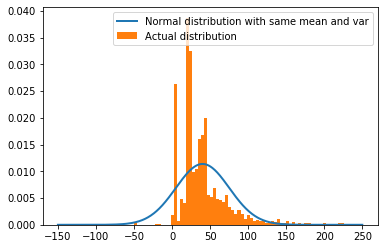

In [36]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(sub1['Amount'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

### <font color=darkblue> Inferences
<font color=darkblue> 
    Skewness range is -1 to +1.                                                     
    Skewness is 2.2033 which indicates the data is still skewed to the right.                                                   
    Kurtosis of 7.056 indicates it is peaked.                                                       
    The data has still some outliers.                                                                               

### <font color=darkblue> Method - 2 Outlier elmination based on IQR
Amount which are lesser than 25% by 1.5 times IQR and                                                     
    amounts which are more than 75% by 1.5 times IQR are outliers.                                                  
    These are eliminated and the remaining values saved in 'sub_iqr' Dataframe

<font color=darkblue> 

In [37]:
sub['is_active'] = sub['is_active'].astype('object')
sub['product_type'] = sub['product_type'].astype('object')
sub['verify_status'] = sub['product_type'].astype('object')
sub['source'] = sub['source'].astype('object')
sub['product_quantity'] = sub['product_quantity'].astype('object')
sub['product_unit_cost'] = sub['product_unit_cost'].astype('object')
#sub['recently_changed_flag'] = sub['recently_changed_flag'].astype('object')
#sub['fulfilled_by_vendor'] = sub['fulfilled_by_vendor'].astype('object')

In [38]:
Q1 = sub.quantile(0.25)
Q3 = sub.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
sub_iqr = sub[~((sub < (Q1 - 1.5 * IQR)) |(sub > (Q3 + 1.5 * IQR))).any(axis=1)]

Amount    29.0
dtype: float64


In [39]:
sub_iqr.shape

(277078, 17)

In [40]:
sub_iqr['is_active'] = sub_iqr['is_active'].astype('object')
sub_iqr['product_type'] = sub_iqr['product_type'].astype('category')
sub_iqr['verify_status'] = sub_iqr['product_type'].astype('category')
sub_iqr['source'] = sub_iqr['source'].astype('object')
sub_iqr['product_quantity'] = sub_iqr['product_quantity'].astype('int')
sub_iqr['product_unit_cost'] = sub_iqr['product_unit_cost'].astype('int')
sub_iqr['subscription_type'] = sub_iqr['subscription_type'].astype('category')
#sub['recently_changed_flag'] = sub['recently_changed_flag'].astype('object')
#sub['fulfilled_by_vendor'] = sub['fulfilled_by_vendor'].astype('object')

### <font color=darkblue> Five Number Summary
<font color=darkblue> Checking the Five Number summary of the Dataset after Ouliter elimination based on IQR

In [41]:
sub_iqr.describe()

,product_quantity,product_unit_cost,Amount
count,277078.000000,277078.000000,277078.000000
mean,1.304510,26.510899,33.130194
std,0.664045,16.776323,20.752476
min,-22.000000,-50.000000,-22.000000
25%,1.000000,19.000000,20.500000
50%,1.000000,22.000000,28.000000
75%,1.000000,33.000000,44.000000
max,10.000000,300.000000,93.000000


### <font color=darkblue> Box Plot
<font color=darkblue> Understanding the summary statistics using Box Plot after outlier elimination based on IQR

Text(0.7, 87.5, 'IQR')

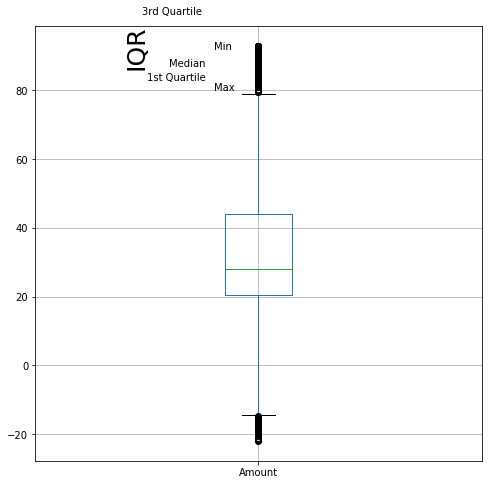

In [42]:
# Create boxplot for column="Amount"
sub_iqr.boxplot(column="Amount",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=102.00, s="3rd Quartile")
plt.text(x=0.8, y=87.00, s="Median")
plt.text(x=0.75, y=83.00, s="1st Quartile")
plt.text(x=0.90, y=92.00, s="Min")
plt.text(x=0.9, y=80.00, s="Max")
plt.text(x=0.7, y=87.5, s="IQR", rotation=90, size=25)

### <font color=darkblue> Plotting the summary Mean, Median, Mode using Histogram
<font color=darkblue> 

Mean:  33.13019366387803 
Median:  28.0 
Mode:  5.0


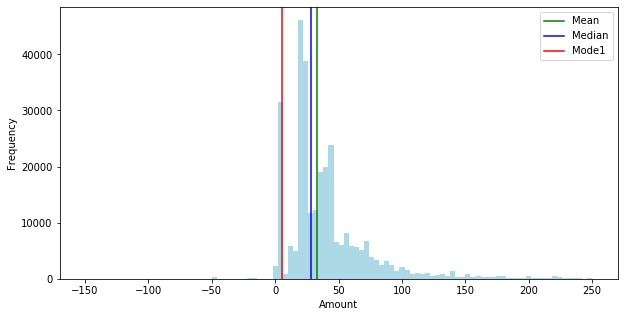

In [43]:
mean=sub_iqr['Amount'].mean()
median=sub_iqr['Amount'].median()
mode=sub_iqr['Amount'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(10,5)) # set the figure size
plt.hist(sub1['Amount'],bins=100,color='lightblue')

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Amount')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

###  IQR

In [44]:
sub_iqr.quantile(0.75) - sub_iqr.quantile(0.25)

product_quantity      0.0
product_unit_cost    14.0
Amount               23.5
dtype: float64

### <font color=darkblue> Check the Skewness and Kurtosis after outlier elimination based on IQR
<font color=darkblue> 

In [45]:
sub_iqr1 = sub_iqr.drop(['is_active', 'product_type','verify_status','source'], axis = 1)

In [46]:
sub_iqr1.skew()

product_quantity     2.219283
product_unit_cost    1.405306
Amount               0.748863
dtype: float64

In [47]:
sub_iqr1.kurt()

product_quantity     18.690621
product_unit_cost     3.040142
Amount                0.105175
dtype: float64

### <font color=darkblue> Histogram for checking the Skewness


<font color=darkblue> 

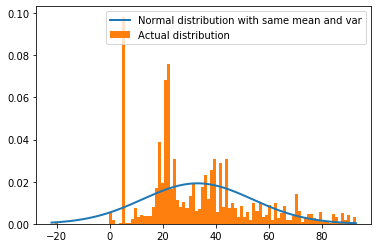

In [48]:
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(sub_iqr1['Amount'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()